In [1]:
import os

from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#reset default graph
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #to eliminate all the warning and loaded library messageos.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

IMG_SIZE = 224
num_classes = 2
resnet_weight_paths = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
SAVE_MODEL = 'catvsdog_trainedmodel.h5'

In [4]:
new_model = Sequential()

new_model.add(ResNet50(include_top=False,
				pooling='avg',
				weights=resnet_weight_paths))

new_model.add(Dense(num_classes,activation = 'softmax'))

#not to train first layer (ResNet) model. It is already trained

new_model.layers[0].trainable = False

#now compile the model
new_model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

#Fit model
data_generator = ImageDataGenerator()

train_generator = data_generator.flow_from_directory(
	'/media/madhi/347b8fa1-b2fa-499a-a0da-3dc2835341ac/madhi/Documents/python programs/intern/signzy/Assignment_2/kagglecatsanddogs_3367a/PetImages',
	target_size = (IMG_SIZE,IMG_SIZE),
	batch_size = 12,
	class_mode = 'categorical'
	)

validation_generator = data_generator.flow_from_directory(
	'/media/madhi/347b8fa1-b2fa-499a-a0da-3dc2835341ac/madhi/Documents/python programs/intern/signzy/Assignment_2/validation_set',
	target_size = (IMG_SIZE,IMG_SIZE),
	class_mode = 'categorical'
	)

#compile the model

new_model.fit_generator(
	train_generator,
	steps_per_epoch = 3,
	epochs=7,
	validation_data = validation_generator,
	validation_steps = 1
)


Found 25000 images belonging to 2 classes.
Found 2111 images belonging to 2 classes.
Epoch 1/7
3/3 [==============================] - 42s 14s/step - loss: 0.6107 - acc: 0.6667 - val_loss: 0.5266 - val_acc: 0.7500
Epoch 2/7
3/3 [==============================] - 35s 12s/step - loss: 0.4987 - acc: 0.7500 - val_loss: 0.2767 - val_acc: 0.9062
Epoch 3/7
3/3 [==============================] - 35s 12s/step - loss: 0.3844 - acc: 0.8333 - val_loss: 0.2825 - val_acc: 0.8750
Epoch 4/7
3/3 [==============================] - 35s 12s/step - loss: 0.3565 - acc: 0.8611 - val_loss: 0.3085 - val_acc: 0.9062
Epoch 5/7
3/3 [==============================] - 37s 12s/step - loss: 0.2253 - acc: 0.9167 - val_loss: 0.1810 - val_acc: 0.9062
Epoch 6/7
3/3 [==============================] - 35s 12s/step - loss: 0.1973 - acc: 0.9722 - val_loss: 0.2485 - val_acc: 0.9062
Epoch 7/7
3/3 [==============================] - 38s 13s/step - loss: 0.2950 - acc: 0.8611 - val_loss: 0.2549 - val_acc: 0.9375


In [5]:
import matplotlib.pyplot as plt 
import os
import cv2
import numpy as np 

from random import shuffle

In [6]:
#convert the test data into numpy array to compute
def process_test_data(TESTING_DATA):
	test_data_path  = './test_data'
	testing_data = []

	for img in TESTING_DATA:
		path = "{data_path}/{image}".format(data_path=test_data_path,image=img)
		img_num = img.split('.')[0]
		img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
		img = cv2.resize(img,(IMG_SIZ,IMG_SIZ))
		testing_data.append([np.array(img),img_num])

	shuffle(testing_data)
	np.save('testing_data.npy',testing_data)

	return testing_data

In [7]:
IMG_SIZ = 224
DATA_PATH = os.listdir('./test_data')

#test_data = process_test_data(DATA_PATH)
test_data = np.load('testing_data.npy')

ValueError: cannot reshape array of size 50176 into shape (224,224,3)

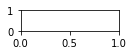

In [21]:
#plot the figure
fig = plt.figure()

for num,data in enumerate(test_data):

	img_num = data[1]
	img_data = data[0]

	y = fig.add_subplot(9,3,num+1)
	orig = img_data
	data = img_data.reshape(IMG_SIZ,IMG_SIZ,3)

	#predict the model
	model_out = new_model.predict_classes([data])[0]

	if np.argmax(model_out) == 1: str_label='Dog'
	else: str_label='Cat'

	y.imshow(orig,cmap = 'gray')
	plt.title(str_label)
	y.axes.get_xaxis().set_visible(False)
	y.axes.get_yaxis().set_visible(False)


plt.show()
plt.savefig('test_labeled.jpg')
